In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

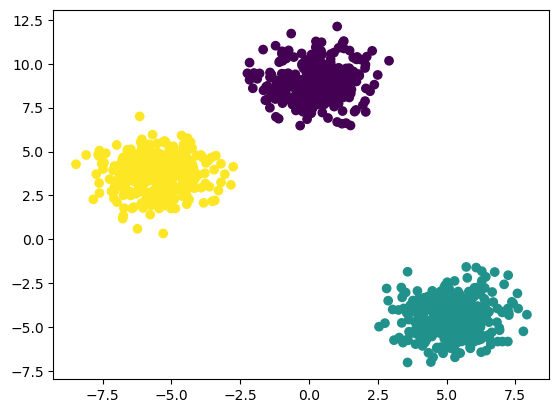

In [8]:
# we generally don't have this y value i.e. target value is not there 
plt.scatter(X[:,0] , X[:,1] , c = y)

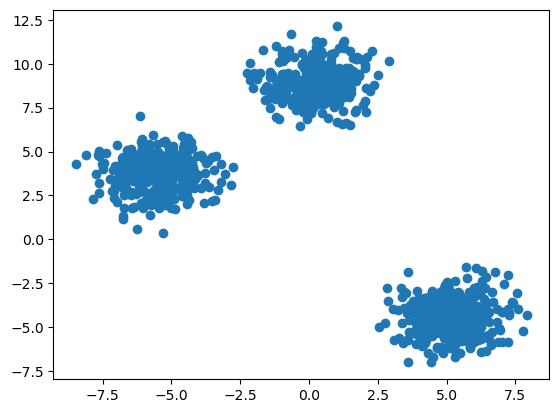

In [9]:
# we have to find these clusters
plt.scatter(X[:,0] , X[:,1])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [12]:
from sklearn.cluster import KMeans

In [13]:
# Now there are 2 methods to find the value of k :-> elbow method or automatic method
# 1. Elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [14]:
wcss

[34827.57682552023,
 7935.43728614542,
 1319.2730531585605,
 1140.4677884655127,
 991.9047984051344,
 854.2929980760773,
 754.6004684050024,
 665.271906842805,
 579.1559561452816,
 533.2805651662813]

Text(0, 0.5, 'WCSS')

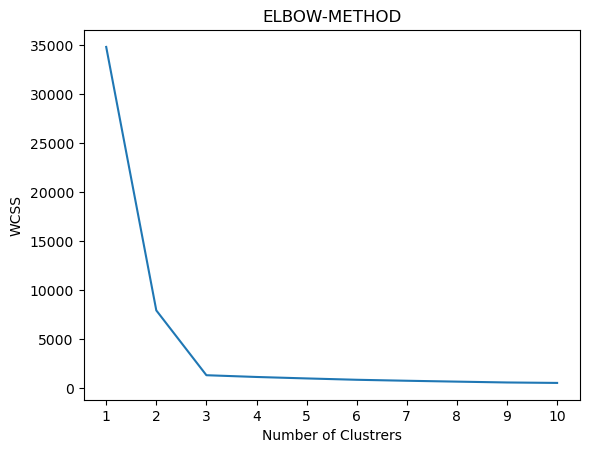

In [19]:
# Plotting elbow curve now 
plt.plot(range(1,11) , wcss)
plt.xticks(range(1,11))
plt.title('ELBOW-METHOD')
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")

# Now where the value becomes stable is the required value i.e. 3 here

In [20]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
y_labels = kmeans.fit_predict(X_train)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


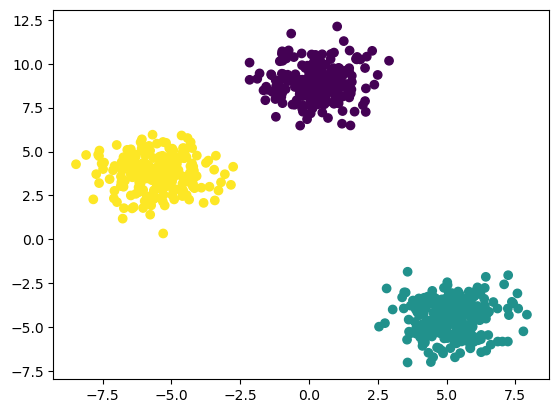

In [24]:
plt.scatter(X_train[:,0] , X_train[:,1] , c = y_labels)

In [28]:
# 2. Using the automated method to find value of k
!pip install kneed
from kneed import KneeLocator

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [29]:
k1 = KneeLocator(range(1,11) , wcss , curve='convex' , direction='decreasing')

In [31]:
k1.elbow 
# this is value of k automated

3

In [32]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [34]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train , kmeans.labels_)
    silhouette_coefficients.append(score)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [35]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6357733426488265,
 0.48140013362224976,
 0.3368477282812842,
 0.34763644559517487,
 0.3379746149410226,
 0.3420361021699276,
 0.34027804919647686]

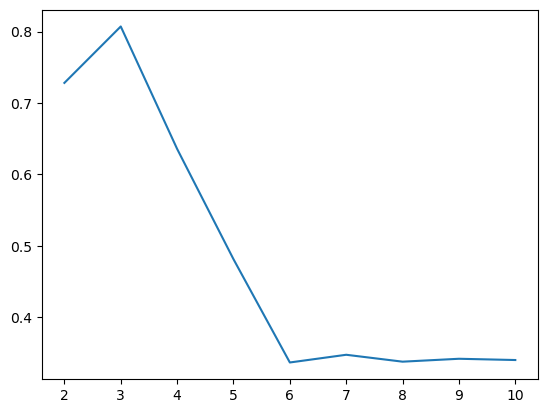

In [36]:
plt.plot(range(2,11) , silhouette_coefficients)
# silhoutte maximum on 3 